In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import numpy as np
import sklearn.linear_model as lm
from sklearn.linear_model import LinearRegression

In [2]:
path = '/home/selaranjeira/Desktop/hurb_python/jupyter/rtg14daysbase.csv'

In [3]:
df = pd.read_csv(path, sep=';')

In [4]:
df.fillna(0, inplace=True)

In [5]:
df['Data'] = pd.to_datetime(df['Data'])

In [6]:
df.head()

,Crescente,Data,Impressões,Cliques,CTR,CPM,Custo,FatTopGeral,FatTopAndroid,FatTopiOS,...,PediOS,PedOutro,TM,ROIRec,RMI,Margem,Frequência,Installs,CPI,Conversão
0,seg.,2020-04-27,31943,654,0.0205,18.76,599.36,0.0,0.0,0.0,...,0.0,0.0,0.00,0.00,-599.36,0.0000,2.07,9,66.60,0.0000
1,ter.,2020-04-28,83893,2304,0.0275,14.20,1191.02,8596.0,8596.0,0.0,...,0.0,0.0,4298.00,0.72,-333.02,0.0998,2.63,45,26.47,0.0009
2,qua.,2020-04-29,91889,2467,0.0268,12.83,1178.83,13232.0,3977.6,6675.0,...,2.0,1.0,2646.40,1.22,259.17,0.1087,2.67,44,26.79,0.0020
3,qui.,2020-04-30,104315,2628,0.0252,11.02,1149.19,5270.6,5270.6,0.0,...,0.0,0.0,1756.87,0.46,-616.59,0.1011,2.44,51,22.53,0.0011
4,sex.,2020-05-01,112975,2861,0.0253,10.72,1211.34,22580.4,16783.6,0.0,...,0.0,2.0,3225.77,1.86,1044.06,0.0999,2.21,74,16.37,0.0024


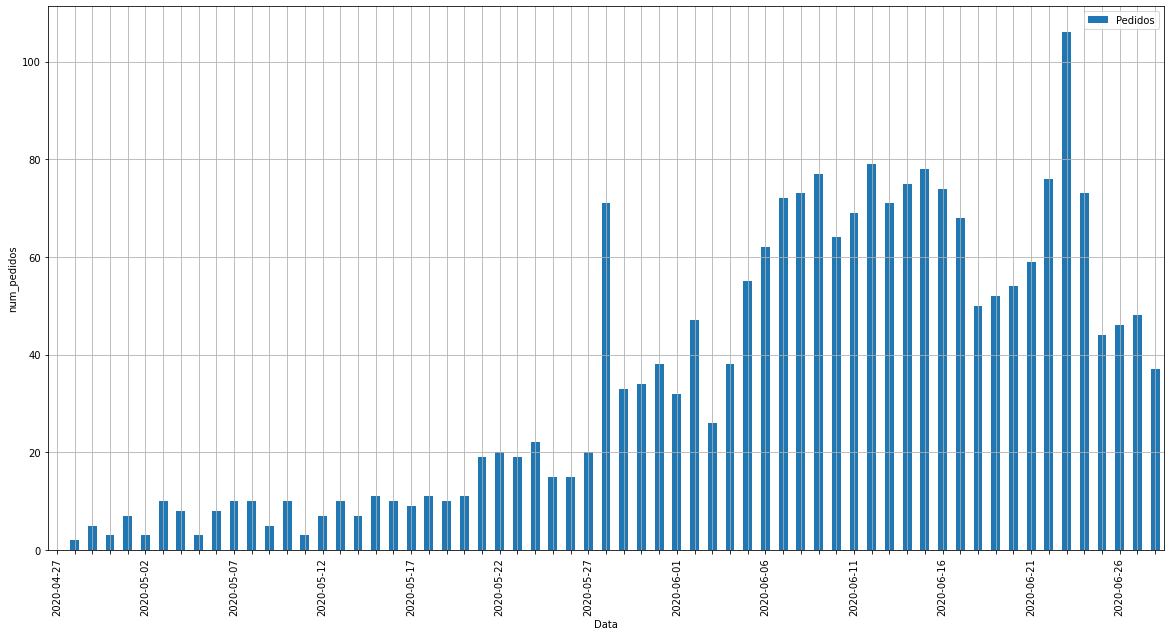

In [7]:
fig, ax = plt.subplots(figsize=(20, 10))
df.plot.bar(x='Data', y='Pedidos', ax=ax)
ticklabels = ['']*len(df)
skip = len(df)//12
ticklabels[::skip] = df['Data'].iloc[::skip].dt.strftime('%Y-%m-%d')
ax.xaxis.set_major_formatter(mticker.FixedFormatter(ticklabels))
# fig.autofmt_xdate()
#fig.suptitle('test title')
# plt.xlabel('periodo')
plt.ylabel('num_pedidos')
plt.grid()
# fig.savefig('test.jpg')
plt.show()

In [8]:
corr = df.corr().style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

In [9]:
corr

,Impressões,Cliques,CTR,CPM,Custo,FatTopGeral,FatTopAndroid,FatTopiOS,FatTopOutro,Receita,RecAndroid,ReciOS,RecOutro,Pedidos,PedAndroid,PediOS,PedOutro,TM,ROIRec,RMI,Margem,Frequência,Installs,CPI,Conversão
Impressões,1.0,0.91,0.15,-0.05,0.95,0.8,0.77,0.72,0.051,0.8,0.78,0.69,0.062,0.85,0.85,0.79,0.12,-0.32,0.27,0.71,0.23,-0.43,0.81,-0.4,-0.37
Cliques,0.91,1.0,0.52,-0.024,0.87,0.83,0.81,0.74,0.02,0.83,0.82,0.72,0.024,0.88,0.88,0.83,0.074,-0.31,0.37,0.77,0.21,-0.51,0.92,-0.49,-0.3
CTR,0.15,0.52,1.0,-0.013,0.16,0.41,0.42,0.35,-0.075,0.4,0.39,0.35,-0.087,0.4,0.4,0.38,-0.11,-0.0025,0.45,0.42,0.063,-0.38,0.55,-0.49,0.1
CPM,-0.05,-0.024,-0.013,1.0,0.21,-0.076,-0.035,-0.13,-0.1,-0.075,-0.029,-0.14,-0.094,-0.049,-0.025,-0.09,-0.093,-0.2,-0.42,-0.13,-0.51,0.4,-0.098,0.59,-0.44
Custo,0.95,0.87,0.16,0.21,1.0,0.74,0.74,0.63,0.013,0.74,0.75,0.61,0.027,0.79,0.8,0.71,0.093,-0.31,0.13,0.64,0.18,-0.31,0.74,-0.27,-0.49
FatTopGeral,0.8,0.83,0.41,-0.076,0.74,1.0,0.97,0.91,0.085,0.99,0.96,0.88,0.088,0.96,0.95,0.93,0.13,-0.21,0.7,0.98,0.17,-0.56,0.82,-0.51,-0.012
FatTopAndroid,0.77,0.81,0.42,-0.035,0.74,0.97,1.0,0.77,-0.043,0.96,0.99,0.74,-0.043,0.93,0.95,0.85,0.024,-0.23,0.65,0.94,0.14,-0.54,0.8,-0.49,-0.011
FatTopiOS,0.72,0.74,0.35,-0.13,0.63,0.91,0.77,1.0,0.19,0.91,0.78,0.98,0.2,0.87,0.81,0.93,0.22,-0.16,0.67,0.91,0.19,-0.51,0.73,-0.47,-0.021
FatTopOutro,0.051,0.02,-0.075,-0.1,0.013,0.085,-0.043,0.19,1.0,0.11,-0.038,0.25,1.0,0.028,-0.029,0.056,0.83,0.18,0.15,0.12,0.19,-0.024,0.061,-0.14,0.08
Receita,0.8,0.83,0.4,-0.075,0.74,0.99,0.96,0.91,0.11,1.0,0.96,0.9,0.11,0.96,0.94,0.93,0.15,-0.2,0.7,0.99,0.22,-0.55,0.82,-0.5,-0.033


In [10]:
# df1 = df[df['Data'] >= '2020-05-28']

In [11]:
# df1.info()

In [ ]:
# Impressões 	Cliques 	CTR 	CPM 	Custo 	FatTopGeral 	FatTopAndroid 	FatTopiOS 	FatTopOutro 	Receita 	RecAndroid 	ReciOS 	RecOutro 	Pedidos 	PedAndroid 	PediOS 	PedOutro 	TM  	ROIRec 	RMI 	Margem 	Frequência 	Installs 	CPI 	Conversão
# 0.85 	       0.88     	0.4    -0.049 	0.79 	0.96          	0.93 	        0.87      	0.028       	0.96 	    0.93 	    0.84 	0.037     	1.0      	0.99      	0.96 	0.12     	-0.37 	0.6 	0.93 	0.16 	-0.55      	0.86     	-0.48 	-0.041

In [12]:
# apos o dia 28/05:
# 0.51 	    0.6     	0.22 	0.25 	0.44 	0.87         	0.76 	        0.72     	0.072 	        0.87 	    0.74 	    0.75 	0.069    	1.0      	0.96     	0.88 	0.088    	-0.36 	0.12 	0.81 	0.36 	0.22     	0.58     	-0.041 	-0.26

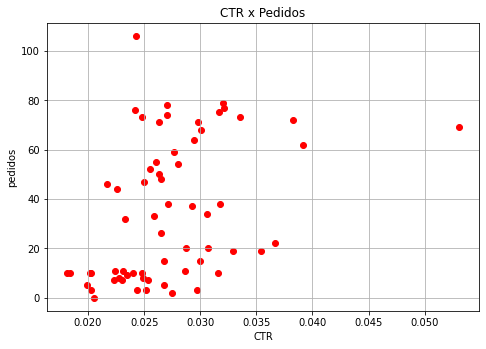

In [27]:
# scatter plot
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.scatter(df['CTR'], df['Pedidos'], color='r')
# ax.scatter(df['CTR'], df['Pedidos'], color='b')
ax.set_xlabel('CTR')
ax.set_ylabel('pedidos')
ax.set_title('CTR x Pedidos')
plt.grid()
plt.show()

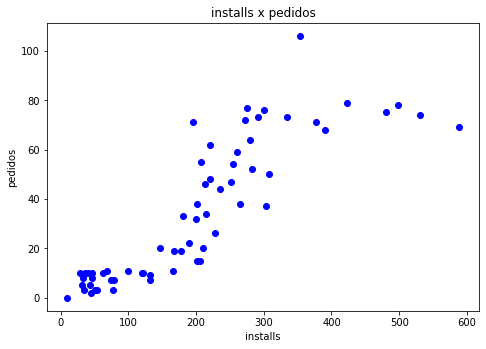

In [26]:
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.scatter(df['Installs'], df['Pedidos'], color='b')
# ax.scatter(df['CTR'], df['Pedidos'], color='b')
ax.set_xlabel('installs')
ax.set_ylabel('pedidos')
ax.set_title('installs x pedidos')
plt.grid()
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

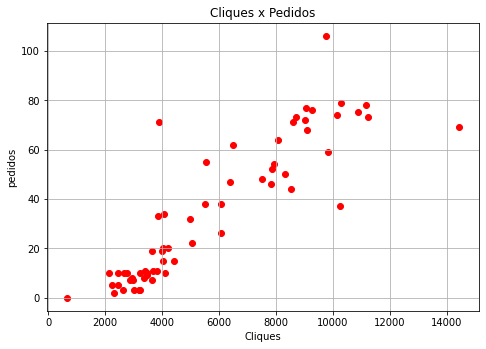

In [28]:
# scatter plot
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.scatter(df['Cliques'], df['Pedidos'], color='r')
# ax.scatter(df['CTR'], df['Pedidos'], color='b')
ax.set_xlabel('Cliques')
ax.set_ylabel('pedidos')
ax.set_title('Cliques x Pedidos')
plt.grid()
plt.show

training_Coefficients: 
 [[0.00761497]]


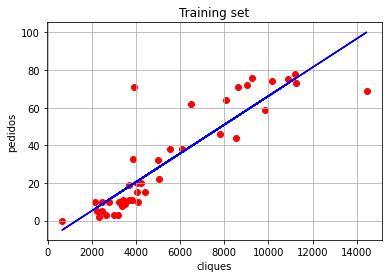

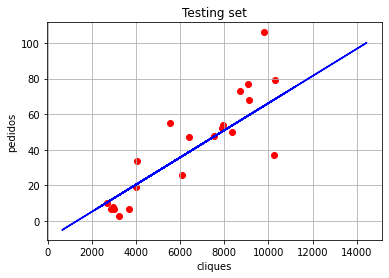

In [50]:
# Regressao:
from sklearn.model_selection import train_test_split

x = df['Cliques'].values.reshape(-1, 1)
y = df['Pedidos'].values.reshape(-1, 1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 1/3)

lm=LinearRegression()
lm.fit(x_train,y_train)

print('training_Coefficients: \n', lm.coef_)

# predictions

plt.scatter(x_train, y_train, color = "red")
plt.plot(x_train, lm.predict(x_train), color = "b")
plt.title("Training set")
plt.xlabel("cliques")
plt.ylabel("pedidos")
plt.grid()
plt.show()

plt.scatter(x_test, y_test, color = "red")
plt.plot(x_train, lm.predict(x_train), color = "b")
plt.title("Testing set")
plt.xlabel("cliques")
plt.ylabel("pedidos")
plt.grid()
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

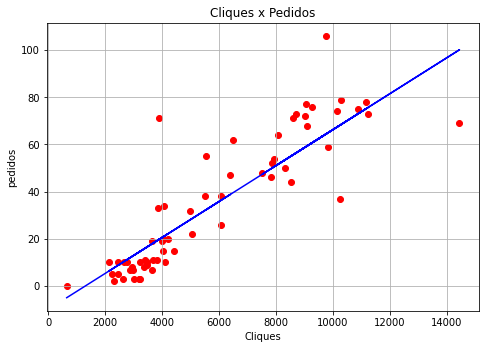

In [52]:
Y_pred = lm.predict(x)  # make predictions
# scatter plot
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.scatter(df['Cliques'], df['Pedidos'], color='r')
ax.set_xlabel('Cliques')
ax.set_ylabel('pedidos')
ax.set_title('Cliques x Pedidos')
plt.plot(x, Y_pred, color='blue')
plt.grid()
plt.show